In [1]:
%reset

In [2]:
import pickle
import networkx as nx
from process_graphs import extract_graphs, find_all_undirected_graphlet_instances, get_instance_ratios, find_possible_n_nodes2

with open('data/medium_ubuntu.pkl', 'rb') as f:
    data = pickle.load(f)



In [3]:
tes = 'out_ar/rs_struct_summ_desc_out.pkl'
with open(tes, 'rb') as f:
    tes = pickle.load(f)
    
print(tes["output_distribution_cppls"][10])

[1728.8177381646226, 338.46527967983315]


In [4]:
ar_conv_out_path = 'out_ar/ar_conv_out.pkl'
ar_conv_struct_path = 'out_ar/ar_conv_struct_out.pkl'
ar_struct_summ_path = 'out_ar/ar_struct_summ_out.pkl'
ar_struct_desc_path = 'out_ar/ar_struct_desc_out.pkl'
ar_struct_summ_desc_path = 'out_ar/ar_struct_summ_desc_out.pkl'

In [37]:
graph_set, indeces_connected_graphs = extract_graphs(data)

#save graphlets to file
import pickle


undirect_graphlet_instances = []
number_of_nodes = []
degree_node_0 = []
in_degree_node_0 = []
out_degree_node_0 = []
cc_node_0 = []
c1_graph = []
cc_node_d_0 = []
closeness_centrality = []
closeness_centrality_dir = []
avg_neighb = []
c1_graph_und = []

for g in graph_set:
    new_g = g.to_undirected()
    #find clustering coefficient of node 0

    degree_node_0.append(new_g.degree(0))
    in_degree_node_0.append(g.in_degree(0))
    out_degree_node_0.append(g.out_degree(0))
    cc_node_0.append(nx.average_clustering(new_g))
    cc_node_d_0.append(nx.average_clustering(g))
    c1_graph.append(nx.clustering(g, 0))
    c1_graph_und.append(nx.clustering(new_g, 0))
    closeness_centrality.append(nx.closeness_centrality(new_g, 0))
    closeness_centrality_dir.append(nx.closeness_centrality(g, 0))
    avg_neighb.append(nx.average_neighbor_degree(new_g)[0])


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

with open(ar_conv_out_path, 'rb') as f:
    ar_conv_out = pickle.load(f)

with open(ar_conv_struct_path, 'rb') as f:
    ar_conv_struct_out = pickle.load(f)
    
with open(ar_struct_summ_path, 'rb') as f:
    ar_struct_summ_out = pickle.load(f)
    
with open(ar_struct_desc_path, 'rb') as f:
    ar_struct_desc_out = pickle.load(f)
    
with open(ar_struct_summ_desc_path, 'rb') as f:
    ar_struct_summ_desc_out = pickle.load(f)
    


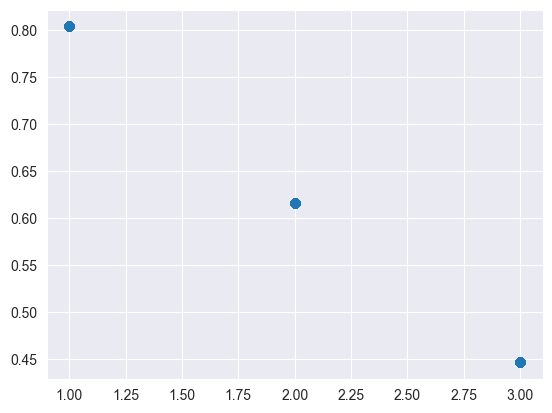

In [21]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
#color palette of 5 colors


import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(degree_node_0, ar_conv_struct_out['row']):
    values = [x for x,y in zip(ar_conv_struct_out['row'], degree_node_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

#plot and put an edge to connect points in the graph
plt.scatter(degree_node_0, new_cc_value)
plt.show()
    


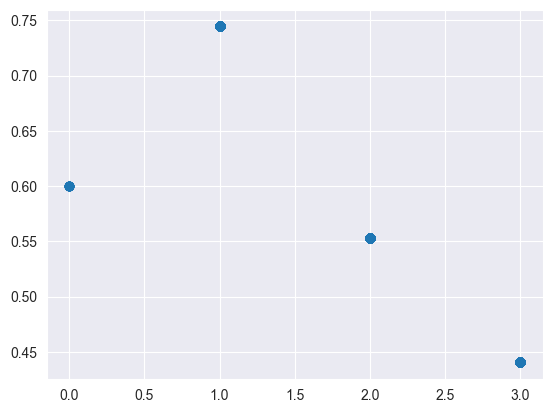

In [22]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(in_degree_node_0, ar_conv_struct_out['row']):
    values = [x for x,y in zip(ar_conv_struct_out['row'], in_degree_node_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(in_degree_node_0, new_cc_value)
plt.show()

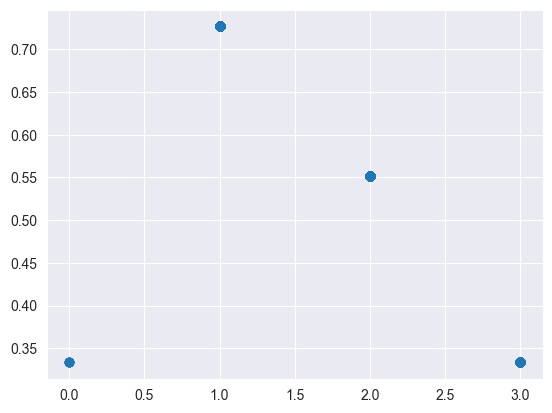

In [23]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(out_degree_node_0, ar_conv_struct_out['row']):
    values = [x for x,y in zip(ar_conv_struct_out['row'], out_degree_node_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(out_degree_node_0, new_cc_value)
plt.show()

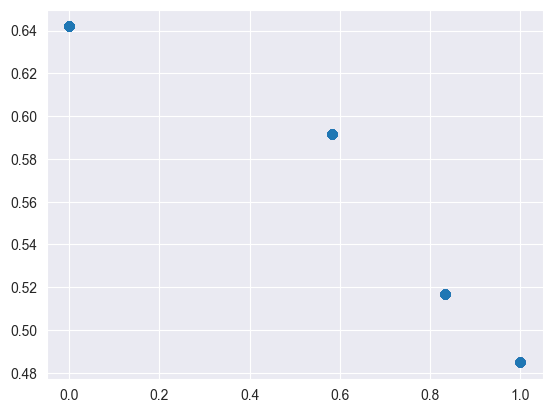

In [24]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(cc_node_0, ar_conv_struct_out['row']):
    values = [x for x,y in zip(ar_conv_struct_out['row'], cc_node_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(cc_node_0, new_cc_value)
plt.show()

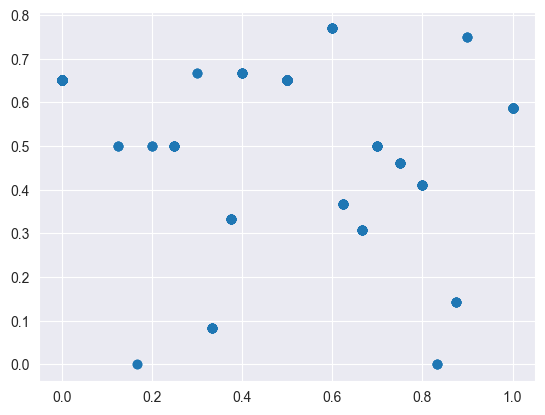

In [25]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(c1_graph, ar_conv_struct_out['row']):
    values = [x for x,y in zip(ar_conv_struct_out['row'], c1_graph) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(c1_graph, new_cc_value)

plt.show()

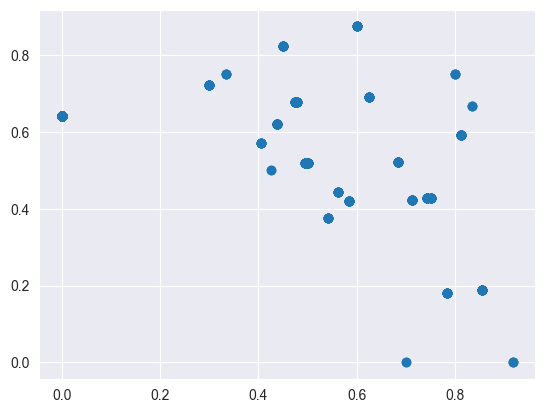

In [26]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(cc_node_d_0, ar_conv_struct_out['row']):
    values = [x for x,y in zip(ar_conv_struct_out['row'], cc_node_d_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(cc_node_d_0, new_cc_value)
plt.show()

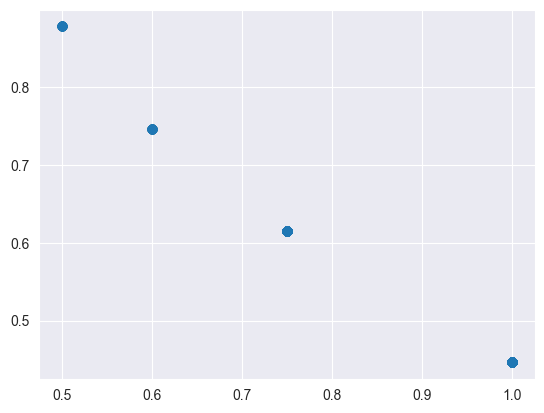

In [29]:
plt.show()
plt.show()
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(closeness_centrality, ar_conv_struct_out['row']):
    values = [x for x, y in zip(ar_conv_struct_out['row'], closeness_centrality) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(closeness_centrality, new_cc_value)
plt.show()

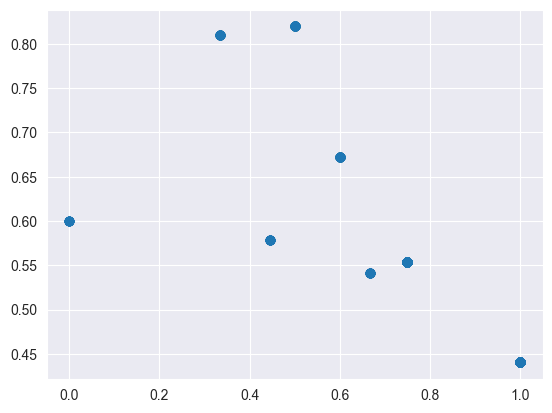

In [32]:
plt.show()
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(closeness_centrality_dir, ar_conv_struct_out['row']):
    values = [x for x, y in zip(ar_conv_struct_out['row'], closeness_centrality_dir) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(closeness_centrality_dir, new_cc_value)
plt.show()

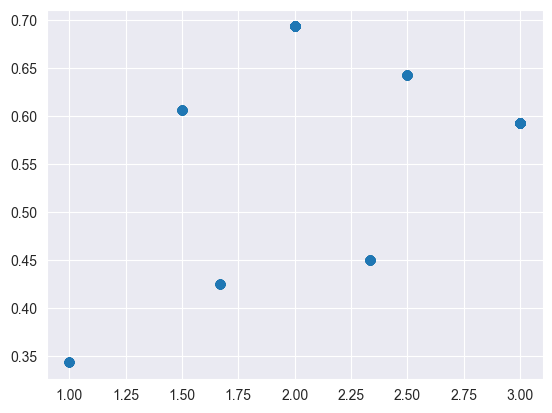

In [36]:
plt.show()
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(avg_neighb, ar_conv_struct_out['row']):
    values = [x for x, y in zip(ar_conv_struct_out['row'], avg_neighb) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(avg_neighb, new_cc_value)
plt.show()

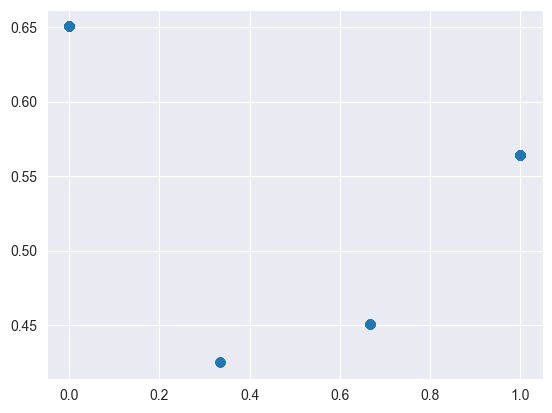

In [39]:
plt.show()
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(c1_graph_und, ar_conv_struct_out['row']):
    values = [x for x, y in zip(ar_conv_struct_out['row'], c1_graph_und) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(c1_graph_und, new_cc_value)
plt.show()